Text(0, 0.5, 'N puzzles')

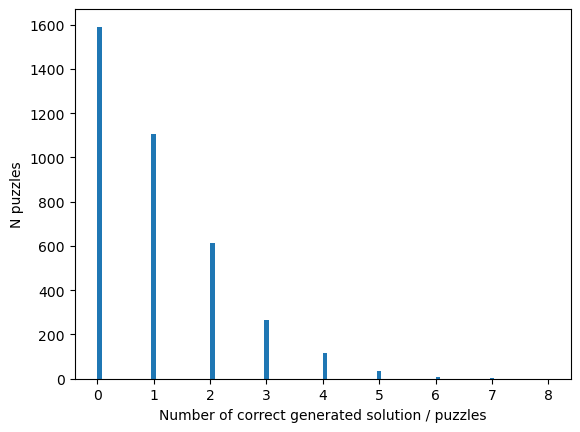

In [1]:
import json
path="/home/flowers/work/OpenELM/analysis_P3/generation/p3_pb_dataset.json"
with open(path, 'r') as f:
    data = json.load(f)
list_correct=[i["n_correct"] for i in data]
import matplotlib.pyplot as plt
plt.hist(list_correct, bins=100)
plt.xlabel('Number of correct generated solution / puzzles')
plt.ylabel('N puzzles')

In [3]:
import numpy as np
list_correct=np.array(list_correct)    

In [5]:
2**8+2**6

320

In [12]:

list_correct==1

array([ True, False, False, ...,  True,  True, False])

In [34]:
correct=0
idx_diff=[idx for idx,i in enumerate(list_correct) if i==correct]
for idx in idx_diff[:20]:
    print("\n==================\n")
    print(data[idx]["instruction"]+"\n"+data[idx]["completion"]+"\n")



def f(li: List[int]):
    return sorted(li) == list(range(999)) and all(li[i] != i for i in range(len(li)))
def g():
    return [((i + 1) % 999) for i in range(999)]



def f(li: List[int]):
    return all([li.count(i) == i for i in range(10)])
def g():
    return [i for i in range(10) for j in range(i)]



def f(li: List[int]):
    return ["The quick brown fox jumps over the lazy dog"[i] for i in li] == list(
        "The five boxing wizards jump quickly")
def g():
    return ['The quick brown fox jumps over the lazy dog'.index(t)
            for t in 'The five boxing wizards jump quickly']



def f(x: float):
    return str(x - 3.1415).startswith("123.456")
def g():
    return 123.456 + 3.1415



def f(li: List[int]):
    return all(sum(li[:i]) == 2 ** i - 1 for i in range(20))
def g():
    return [(2 ** i) for i in range(20)]



def f(i: int):
    return len(str(i + 1000)) > len(str(i + 1001))
def g():
    return -1001



def f(li: List[int]):
    return {i + j for i in li for j i

In [1]:
# top_logprobs
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from openai import AzureOpenAI
from key import OPENAI_API_KEY,cfg_client_azure
from utils import get_multiple_completions
import json
cfg_client=cfg_client_azure
model_id=cfg_client_azure["model_id"]
del cfg_client_azure["model_id"]
cfg: dict = {
"temperature": 0.0,
# "top_p": 1.,
# TODO: rename config option?
"model": model_id,
# "logprobs": True,
# "top_logprobs": 5,ez
}
max_retries=10
timeout=30
client = AzureOpenAI(**cfg_client,max_retries=max_retries, timeout=timeout)

In [2]:
# from openai import OpenAI
# import os
# from key import together_api_key
# TOGETHER_API_KEY = together_api_key

# client = OpenAI(
#   api_key=TOGETHER_API_KEY,
#   base_url='https://api.together.xyz/v1',
# )
# cfg: dict = {
# "temperature": 0.0,
# # "top_p": 1.,
# # TODO: rename config option?
# "model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
# # "logprobs": True,
# # "top_logprobs": 5,ez
# }




In [2]:
import ast

def insert_docstring_in_function(code, func_name, new_docstring):
    """
    Inserts or replaces a docstring in the specified function within the given Python code.

    Parameters:
    - code (str): The Python source code.
    - func_name (str): The name of the function to modify.
    - new_docstring (str): The new docstring to insert into the function.

    Returns:
    str: The modified Python source code.
    """

    # Parse the Python code to an AST
    tree = ast.parse(code)

    # Function to check if a node is the target function
    def is_target_function(node):
        return isinstance(node, ast.FunctionDef) and node.name == func_name

    # Traverse the AST to find the target function
    for node in ast.walk(tree):
        if is_target_function(node):
            # If the function already has a docstring (first element of the body is an Expr containing a Str),
            # replace it. Otherwise, insert a new docstring at the beginning of the function body.
            if node.body and isinstance(node.body[0], ast.Expr) and isinstance(node.body[0].value, ast.Str):
                node.body[0].value.s = new_docstring
            else:
                node.body.insert(0, ast.Expr(value=ast.Str(s=new_docstring)))

    # Convert the modified AST back to source code
    modified_code = ast.unparse(tree)
    return modified_code

In [3]:
path = "/home/flowers/work/OpenELM/analysis_P3/generation/puzzle_survey_v2.json"
with open(path) as f:
    data=json.load(f)

In [4]:
len(data)

15

In [5]:
list_data=[]
list_idx=[]
for idx,i in enumerate(data):
    print(i["origin"])
    # print(i["formatted"])
    if i["origin"]!="train":
        list_data.append(i)
        list_idx.append(idx)

train
train
train
train
train
test
test
test
elm
elm
rd_gen
rd_gen
aces
aces
aces


In [6]:
list_puzzle=[i['formatted_nodoc'] for i in list_data]

In [7]:
# def description(puzzle):
#     level = "master's student in CS"#"master's student"
#     # skills format
#     base_persona ="You are a helpful assistant to a Professor teaching a programming course in Python. "
#     base_persona += f"The Professor want to give Pyhton programming puzzles to his {level} to teach them Python. "#f"The teacher have assign to {level} in CS to create a python programming puzzle.\n"
#     base_persona = "You are helpful assistant to write Leetcode style Python programming puzzles description.\n"
#     # base_persona += f"The Professor have assign to {level} in CS to create a python programming puzzle.\n"
#     base_persona += "A Python programming puzzle is defined by two functions, the problem f(solution, arg1=value1, arg2=value2, ..) and the solution g(arg1=value1, arg2=value2, ...). f defines an algorithmic challenge, and g solves this challenge. g is a correct solution to f if and only if f(g()) == True."
#     prompt=base_persona
#     puzzle=puzzle.split('def g')[0].strip() + "\ndef g(...): \n    assert f(g()) == True\n"
#     # prompt += "The Professor lost the puzzle description, can you write a **short** description of the following puzzle please?"
#     # prompt += "\nYour role is to write in NLP a **short** problem statement of the following Python problem." 
#     prompt+= "\nYour role is to write a **short** description of the puzzle's goal (what the function g should return), remember that the solution that satisfy the goal must be given as the first argument of `f` so `f(g()) return True. "
#     prompt += "You can start by: 'The goal of the puzzle is to give a solution that ...(here you should explain what properties the solution should have to satisfy the goal of the puzzle).'"
#     ex="'Abbreviate strings longer than a given length by replacing everything but the first and last characters by an integer indicating how many characters there were in between them.'\n"
#     ex+="'The goal of the puzzle is to give a solution that returns the element in the list `li` at the specified index `index`, such that the index of this element in the list is equal to the provided index value.'"
#     # prompt += "\nYour role is to write a **short** objective of the puzzle on how the student should answer (write the function `g`) to solve the following Python problem. "
#     # prompt += "Don't forget that the first argument of `f` is always the output from `g()` (e.g., `def f(arg0, arg1=value1, arg2=value2, ...)` and `def g(arg1=value1, arg2=value2, ...)`)."
#     prompt += "Here are some example:\n"+ex
#     prompt += "\n\nThe puzzle is:\n```python\n" + puzzle + "\n```\n"
#     return prompt

In [8]:
import ast

def find_first_argument_of_first_function(code):
    parsed_code=ast.parse(code)
    for node in ast.walk(parsed_code):
        if isinstance(node, ast.FunctionDef):
            first_arg = node.args.args[0].arg  # Get the first argument
            # print(f"The first argument of the function '{node.name}' is: {first_arg}")
            return first_arg




def description(puzzle):
    level = "master's student in CS"#"master's student"
    # skills format
    base_persona ="You are a helpful assistant to a Professor teaching a programming course in Python. "
    base_persona += f"The Professor want to give Pyhton programming puzzles to his {level} to teach them Python. "#f"The teacher have assign to {level} in CS to create a python programming puzzle.\n"
    # base_persona += f"The Professor have assign to {level} in CS to create a python programming puzzle.\n"
    base_persona = "A Python programming puzzle is defined by two functions, the problem f(solution, arg1=value1, arg2=value2, ..) and the solution. f defines an algorithmic puzzle, and the solution solves this puzzle.\nYou should pay a particular attention that the puzzle is solved if and only if **f(solution) == True**."
    arg=find_first_argument_of_first_function(puzzle)

    prompt=base_persona
    puzzle=puzzle.split('def g')[0].strip() + "\n\ndef g(...):\n\nassert f(g()) == True\n"
    # prompt += "The Professor lost the puzzle description, can you write a **short** description of the following puzzle please?"
    # prompt += "\nYour role is to write in NLP a **short** problem statement of the following Python problem." 
    prompt+= "\nYour role is to write a one or two sentence the description of the puzzle's goal (what the solution should be), remember that the solution that satisfy the goal must be given as the first argument of `f`. "
    # prompt += "You can start by: 'The goal of the puzzle is to give a solution that ...(here you should explain what properties the solution should have to satisfy the goal of the puzzle).'"
    prompt += f"You can start by: 'Find the solution: `{arg}` (describe its type shortly) that should (here you should speak about the solution: `{arg}` and how it should solve all the constraints of the puzzle with respect to others args (describe their types shortly)) ...'. "
    prompt+= "For example:\n'Given a string `str1`, find the length of the longest substring without repeating characters.'\n"
    prompt+="'Given two sorted arrays `nums1` and `nums2` of size `m` and `n` respectively, return the median of the two sorted arrays.'\n"
    # prompt += "\nYour role is to write a **short** objective of the puzzle on how the student should answer (write the function `g`) to solve the following Python problem. "
    # prompt += "Don't forget that the first argument of `f` is always the output from `g()` (e.g., `def f(arg0, arg1=value1, arg2=value2, ...)` and `def g(arg1=value1, arg2=value2, ...)`)."
    prompt += "\n\nThe puzzle is:\n```python\n" + puzzle + "\n```\n"
    return prompt

In [9]:
full_prompt="""A Python programming puzzle is defined by two functions, the problem f(solution, arg1=value1, arg2=value2, ..) and the solution. f defines an algorithmic puzzle, and the solution solves this puzzle.
You should pay a particular attention that the puzzle is solved if and only if **f(solution) == True**.
Your role is to write a one or two sentence the description of the puzzle's goal (what the solution should be), remember that the solution that satisfy the goal must be given as the first argument of `f`.
You can start by: 'Find the solution: {arg_sol} (describe its type shortly) that should (here you should speak about the solution: {arg_solb} and how it should solve all the constraints of the puzzle with respect to others args (describe their types shortly)) ...'. 
For example:
'Given a string `str1`, find the length of the longest substring without repeating characters.'
'Given two sorted arrays `nums1` and `nums2` of size `m` and `n` respectively, return the median of the two sorted arrays.'


The puzzle is:
```python
{puzzle}
```
"""
puzzle=list_puzzle[0]
arg=find_first_argument_of_first_function(puzzle)
puzzle=puzzle.split('def g')[0].strip() + "\n\ndef g(...):\n\nassert f(g()) == True"
print(full_prompt.format(arg_sol=arg,arg_solb=arg,puzzle=puzzle))

A Python programming puzzle is defined by two functions, the problem f(solution, arg1=value1, arg2=value2, ..) and the solution. f defines an algorithmic puzzle, and the solution solves this puzzle.
You should pay a particular attention that the puzzle is solved if and only if **f(solution) == True**.
Your role is to write a one or two sentence the description of the puzzle's goal (what the solution should be), remember that the solution that satisfy the goal must be given as the first argument of `f`.
You can start by: 'Find the solution: item (describe its type shortly) that should (here you should speak about the solution: item and how it should solve all the constraints of the puzzle with respect to others args (describe their types shortly)) ...'. 
For example:
'Given a string `str1`, find the length of the longest substring without repeating characters.'
'Given two sorted arrays `nums1` and `nums2` of size `m` and `n` respectively, return the median of the two sorted arrays.'


T

In [11]:
list_prompt=[description(puz) for puz in list_puzzle]
out=get_multiple_completions(client,list_prompt,cfg)
# print(out)
list_puzzle_processed = [insert_docstring_in_function(list_puzzle[i],"f",out[i]) for i in range(len(list_puzzle))]
for i in range(len(list_puzzle_processed)):
    print("\n\n============\n")
    print(list_puzzle_processed[i])




def f(item: int, li=[93, -13, -56, 19], index=2):
    """Find the solution: `item` (integer) that should be equal to the value at the specified index in the list `li`, given the default list and index values."""
    return li.index(item) == index

def g(li=[93, -13, -56, 19], index=2):
    return li[index]



def f(s: str, target=''):
    """Find the solution: `target` (string) that should be the result of swapping the case of characters in `s` and translating it using a specific substitution dictionary, such that it matches the provided `target` string after translation."""
    subs = {ord(c): ord(c) + 2 for c in 'aeiouAEIOU'}
    return s.swapcase() == target.translate(subs)

def g(target=''):
    subs = {ord(c): ord(c) + 2 for c in 'aeiouAEIOU'}
    return target.translate(subs).swapcase()



def f(containers: List[str], strings=['cat', 'dog', 'shatter', 'bear', 'at', 'ta'], substring='at'):
    """Find the solution: `containers` (list of strings) that should contain all the stri

In [17]:

for i,id in enumerate(list_idx):
    data[id]["formatted"]=list_puzzle_processed[i]

with open(path, 'w') as f:
    json.dump(data, f, indent=4)